In [52]:
import os
from typing import List, Dict, Tuple
import dateutil.parser
import nltk
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

/home/eyal/Desktop/University/7th_Semester/PPL/Project/.env/lib/python3.8/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [53]:
plt.rcParams['figure.figsize'] = (10,5)

In [54]:
df = pd.read_csv('../data/csvs/Crime_DF_Date.csv')

In [55]:
df.columns

Index(['CMPLNT_FR_DT', 'ADDR_PCT_CD', 'KY_CD', 'OFNS_DESC', 'BORO_NM'], dtype='object')

In [56]:
LOWEST_DATE = dateutil.parser.parse('1/1/2000').date()
def date_from_str(date: str):
    """
    Converts string to datetime object.
    If date is lower than thershold we return nan.

    Parameters
    ----------
    date: str
        String of the date.

    Returns
    -------
    date: DateTime
        DateTime object of the string that was given.

    """
    if isinstance(date, float) and math.isnan(date):
        return np.nan
    date = dateutil.parser.parse(date).date()
    if date < LOWEST_DATE:
        return np.nan
    return date

In [57]:
df['CMPLNT_FR_DT'] = df['CMPLNT_FR_DT'].progress_apply(lambda date: date_from_str(date))

In [58]:
start = dateutil.parser.parse(f'1/1/2015').date()
end = dateutil.parser.parse(f'1/1/2016').date()
df = df[(df['CMPLNT_FR_DT'] >= start) & (df['CMPLNT_FR_DT'] < end)]


In [59]:
df = df[df['ADDR_PCT_CD'] != -99.0]

In [60]:
df['year'] = df['CMPLNT_FR_DT'].progress_apply(lambda date: date.year)
df['month'] = df['CMPLNT_FR_DT'].progress_apply(lambda date: date.month)
df['year_month'] = df['CMPLNT_FR_DT'].progress_apply(lambda date: str(date.year) + str(date.month))

In [61]:
s = df[['month', 'BORO_NM', 'KY_CD', 'OFNS_DESC']].groupby(['month', 'BORO_NM', 'OFNS_DESC']).count().reset_index()

In [62]:
s

,month,BORO_NM,OFNS_DESC,KY_CD
0,1,BRONX,BURGLARY,206
1,1,BRONX,FELONY ASSAULT,372
2,1,BRONX,GRAND LARCENY,418
3,1,BRONX,ROBBERY,352
4,1,BROOKLYN,BURGLARY,431
...,...,...,...,...
235,12,QUEENS,ROBBERY,295
236,12,STATEN ISLAND,BURGLARY,46
237,12,STATEN ISLAND,FELONY ASSAULT,60
238,12,STATEN ISLAND,GRAND LARCENY,112


In [92]:
plt.rcParams['figure.figsize'] = (15,10)

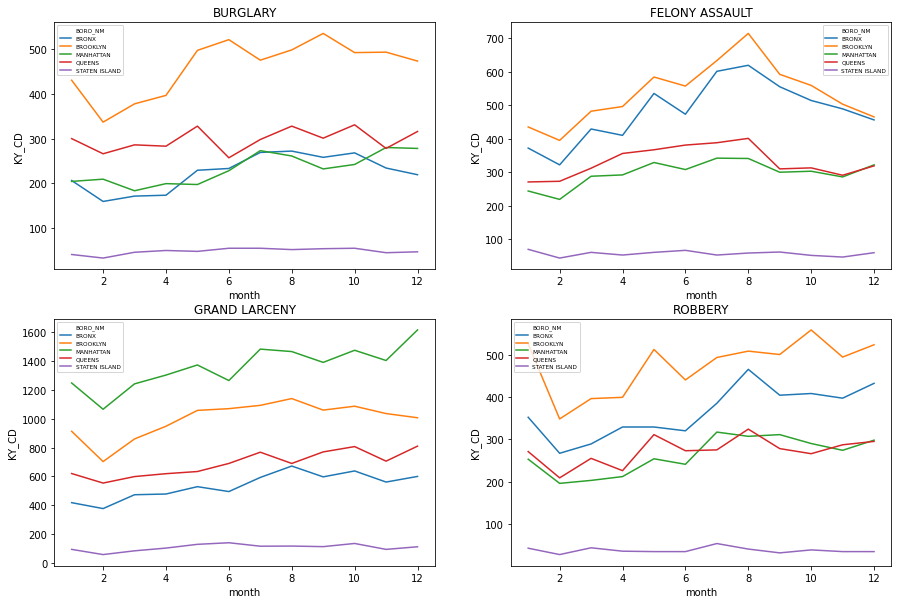

In [95]:
f, axes = plt.subplots(2, 2)
for i, crime in enumerate(s['OFNS_DESC'].unique()):
    d = s[s['OFNS_DESC'] == crime]
    sns.lineplot(data=d, x='month', y='KY_CD', hue='BORO_NM', ax=axes[i//2, i%2])
    axes[i//2, i%2].legend(fontsize='xx-small', title_fontsize='5')
    axes[i//2, i%2].set_title(crime)
plt.show()

In [ ]:
sns.lineplot(data=year_df, x='CMPLNT_FR_DT', y='KY_CD', hue='year')

In [ ]:
year_df['BORO_NM']

In [ ]:
sns.countplot(data=year_df, x="year", hue="KY_CD")

In [69]:
g = sns.FacetGrid(df, col="OFNS_DESC", height=5, aspect=0.8)
ax = g.map_dataframe(sns.lineplot, x="CMPLNT_FR_DT", y="KY_CD", hue="BORO_NM")
g.add_legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f103c304a60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [ ]:
def load_articles(path: str) -> pd.DataFrame:
    
    df = pd.DataFrame()
    
    cities = os.listdir(path)
    for city in (t_city := tqdm(cities, leave=False)):
        t_city.set_description(f'{city}')
        
        city_path = os.path.join(path, city)
        cbs = os.listdir(city_path)
        
        for cb in (t_cb := tqdm(cbs, leave=False)):
            t_cb.set_description(f'{cb}')
            
            cb_path = os.path.join(city_path, cb)
            neighborhoods = os.listdir(cb_path)
            
            for neighborhood in (t_neighborhood := tqdm(neighborhoods, leave=False)):
                t_neighborhood.set_description(f'{neighborhood}')
                
                neighborhood_path = os.path.join(cb_path, neighborhood)
                articles = os.listdir(neighborhood_path)
                
                for article in articles:
                    article_path = os.path.join(neighborhood_path, article)
                    with open (article_path, 'r') as f:
                        article = f.read()
                    series = pd.Series({'city': city, 'cb': cb, 'neighborhood': neighborhood, 'articles': article})
                    df = df.append(series, ignore_index=True)
                    
    return df

In [ ]:
df = load_articles('../data/articles')

In [ ]:
stop_words |= set(df.cb.unique()) | set(df.city.unique()) | set(df.neighborhood.unique())

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['articles'] = df['articles'].progress_apply(lambda article: ' '.join([w for w in article.split(' ') if not w in stop_words]))

In [ ]:
def generate_wordcloud(df: pd.DataFrame, column: str, value: str) -> None:

    filtered_df = df[df[column] == value]
    text = " ".join(article for article in filtered_df.articles)
    wordcloud = WordCloud(width=800, height=600, stopwords=stop_words, background_color="black").generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{column}: {value}')
    plt.axis("off")
    plt.show()

In [ ]:
generate_wordcloud(df, 'city', 'New York')

In [ ]:
generate_wordcloud(df, 'city', 'Chicago')

### Chicago Wordclouds

In [ ]:
chicago_df = df[df.city == 'Chicago']
for cb in chicago_df.cb.unique():
    generate_wordcloud(df, 'cb', cb)

### New York Wordclouds

In [ ]:
newyork_df = df[df.city == 'New York']
for cb in newyork_df.cb.unique():
    generate_wordcloud(df, 'cb', cb)